In [1]:
# measuremnt patterns to optyx zx:
    # convert to pyzx, then convert pyzx to optyx

In [1]:
from graphix.transpiler import Circuit
# apply H gate to a qubit in + state
circuit = Circuit(1)
circuit.h(0)
pattern = circuit.transpile().pattern

In [2]:
pattern

graphix.pattern.Pattern object with 4 commands and 1 output qubits

In [3]:
from optyx.qubits import Circuit as Circuit_

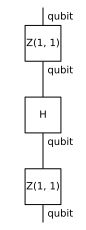

In [4]:
Circuit_(pattern).draw()

In [5]:
pattern.get_measurement_commands()

[M(node=0, plane=<Plane.XY: 1>, angle=0.0, s_domain=set(), t_domain=set())]

In [6]:
pattern.correction_commands()

[X(node=1, domain={0})]

In [7]:
pattern.get_graph()

([0, 1], [(0, 1)])

In [8]:
import graphix

In [9]:
from graphix import opengraph
from graphix import pyzx

In [10]:
og = opengraph.OpenGraph.from_pattern(pattern)

In [11]:
import pyzx as zx

zx.draw(pyzx.to_pyzx_graph(og))

In [12]:
graph = pyzx.to_pyzx_graph(og)

In [13]:
graph.inputs()

(0,)

In [14]:
Circuit(pyzx.to_pyzx_graph(og))

TypeError: 'GraphS' object cannot be interpreted as an integer

In [15]:
import numpy as np
rng = np.random.default_rng()

circuit = Circuit(2)

# apply rotation gates
theta = rng.random(4)
circuit.rz(0, theta[0])
circuit.rz(1, theta[1])
circuit.cnot(0, 1)
circuit.s(0)
circuit.cnot(1, 0)
circuit.rz(1, theta[2])
circuit.cnot(1, 0)
circuit.rz(0, theta[3])

pattern = circuit.transpile().pattern

In [16]:
og = opengraph.OpenGraph.from_pattern(pattern)

In [17]:
zx.draw(pyzx.to_pyzx_graph(og))

In [18]:
graph = pyzx.to_pyzx_graph(og)

In [19]:
graph._inputs = tuple(graph.inputs())
graph._outputs = tuple(graph.outputs())

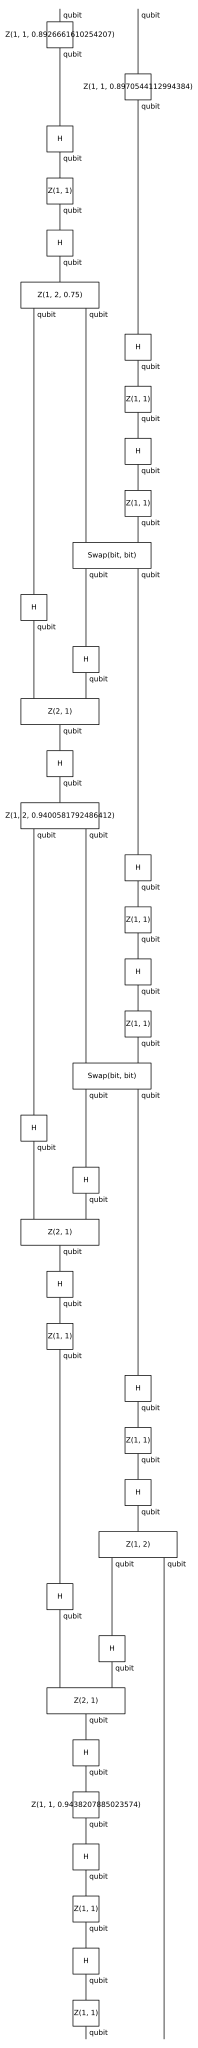

In [20]:
Circuit_(graph).draw()

In [21]:
# underlying graphs to optyx zx
    # get networkx graph
    # get an opengraph from networkx graph, input_nodes, output_nodes
    # convert to pyzx graph

In [22]:
pattern.input_nodes

[0, 1]

In [23]:
pattern.output_nodes

[17, 13]

In [24]:
import networkx as nx
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

In [25]:
og = opengraph.OpenGraph(
    g,
    {},
    pattern.input_nodes,
    pattern.output_nodes,
)

In [26]:
zx.draw(pyzx.to_pyzx_graph(og))

In [27]:
# tests?????

In [28]:
from optyx import qubits

In [248]:

rng = np.random.default_rng()
theta = rng.random(4)

In [249]:
import numpy as np

circuit = Circuit(2)
# apply rotation gates
circuit.rz(0, theta[0])
circuit.rz(1, theta[1])
circuit.cnot(0, 1)
circuit.s(0)
circuit.cnot(1, 0)
circuit.rz(1, theta[2])
circuit.cnot(1, 0)
circuit.rz(0, theta[3])

pattern = circuit.transpile().pattern

In [252]:
(qubits.Ket("+")**2 >> Circuit_(pattern)).eval().amplitudes

{(0, 0): (0.17677669529663653-1.9509110271438673e-17j),
 (0, 1): (0.07398822022104055-0.16054825837897677j),
 (1, 0): (-0.1758803710896471+0.01777906255593636j),
 (1, 1): (-0.1749240379055329-0.02552608396960968j)}

In [258]:
b = {(0, 0): (0.17677669529663653-1.9509110271438673e-17j),
 (0, 1): (0.07398822022104055-0.16054825837897677j),
 (1, 0): (-0.1758803710896471+0.01777906255593636j),
 (1, 1): (-0.1749240379055329-0.02552608396960968j)}

#standardise b so that np.sqrt(np.sum(np.abs(b.values())**2)) == 1

new_b = {key: value / np.sqrt(np.sum(np.abs(list(b.values()))**2)) for key, value in b.items()}

In [259]:
new_b

{(0, 0): (0.5-5.518009667140176e-17j),
 (0, 1): (0.20927028898488606-0.4540990488298586j),
 (1, 0): (-0.4974648123003845+0.05028678278576983j),
 (1, 1): (-0.49475989358214095-0.07219866828819306j)}

In [253]:
pattern

graphix.pattern.Pattern object with 70 commands and 2 output qubits

In [254]:
from graphix.simulator import PatternSimulator
import graphix.states

simulator = PatternSimulator(pattern, backend="statevector")
dm_result = simulator.run(input_state=graphix.states.BasicStates.PLUS)

In [255]:
simulator.backend.state.psi

array([[ 0.5       +0.j        ,  0.20927029+0.45409905j],
       [-0.49746481-0.05028678j, -0.49475989+0.07219867j]])

In [243]:
dm_result

In [244]:
circuit = Circuit(2)
circuit.x(1)
circuit.h(0)
circuit.cnot(0, 1)
circuit.rx(0, np.pi / 2)
circuit.ry(1, np.pi / 2)
circuit.h(0)
circuit.h(1)
circuit.cnot(1, 0)

pattern = circuit.transpile().pattern
simulator = PatternSimulator(pattern, backend="statevector")
dm_result = simulator.run(input_state=graphix.states.BasicStates.ZERO)
dm_result

In [245]:
circuit = Circuit(2)
circuit.h(1)
circuit.x(0)
circuit.cnot(1, 0)

pattern = circuit.transpile().pattern
simulator = PatternSimulator(pattern, backend="statevector")
simulator.run()

In [246]:
simulator.backend.state.psi

array([[-0.70710678+0.j,  0.        +0.j],
       [-0.70710678+0.j,  0.        +0.j]])

In [235]:
pattern.get_measurement_commands()

[M(node=1, plane=<Plane.XY: 1>, angle=0.0, s_domain=set(), t_domain=set()),
 M(node=0, plane=<Plane.XY: 1>, angle=0.0, s_domain=set(), t_domain=set()),
 M(node=3, plane=<Plane.XY: 1>, angle=-1, s_domain=set(), t_domain=set()),
 M(node=4, plane=<Plane.XY: 1>, angle=0.0, s_domain={3}, t_domain={0}),
 M(node=5, plane=<Plane.XY: 1>, angle=0.0, s_domain=set(), t_domain={1, 3})]

In [237]:
(qubits.Ket("0")**2 >> Circuit_(pattern)).eval().prob_dist()

{(0, 0): 9.373498641636595e-34,
 (0, 1): 0.24999999999999956,
 (1, 0): 9.373498641636595e-34,
 (1, 1): 0.24999999999999956}

In [172]:
(qubits.Ket("+")**2 >> Circuit_(pattern)).eval().tensor

tensor.Box[complex128]('Result', Dim(1), Dim(2, 2), data=array([[0.70710678+0.j, 0.        +0.j],
       [0.70710678+0.j, 0.        +0.j]]))